In [1]:
%load_ext autoreload 
%autoreload 2

import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(os.path.join(os.getcwd(), ".."))

import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import importlib
import model as md
import view as vw

importlib.reload(md)
importlib.reload(vw)

c:\Users\Артем\Desktop\Вуз\Аспирантура\Диссертация\Алгоритм\Relaxation_frequency_phase_algorithm\notebooks\Complex_ms\..


<module 'view' from 'c:\\Users\\Артем\\Desktop\\Вуз\\Аспирантура\\Диссертация\\Алгоритм\\Relaxation_frequency_phase_algorithm\\view\\__init__.py'>

In [2]:
def get_phase_kde(t,I,U,F,duration_in_T,get_phase_method):
    time, phase=get_phase_method(t,I,U,F,duration_in_T)
    return abs(md.get_kde_mode(phase))

In [3]:
phase_methods = [
    md.get_phase_maxpoint,
    md.get_phase_hilbert,
    md.get_phase_FFT,
    md.get_phase_lockin,
    md.get_phase_xcorr2
]

In [4]:
F_main_real=440e3
duration_in_T=10
duration = 100/F_main_real
fs = F_main_real

fs_mults=[]
phases = np.arange(1, 180, 1) 
phase_diffs_all_methods_all_fs=[]

for fs_mult in range (3,30,1):
    fs_mults.append(fs_mult)
    print("fs="+str(fs_mult))

    phase_diffs_all_methods=[]
    for method_id in range(0,len(phase_methods),1):
        max_KDE=0
        for phase_real in phases:
            t = np.arange(0, duration, 1/(fs_mult*fs))
            U = md.generate_sin(t,F_main_real,2)
            I = md.generate_sin(t,F_main_real,2,phase_real)

            #print(phase_real,phase_methods[method_id],fs_mult)
            current_KDE_diff=get_phase_kde(t,I,U,F_main_real,duration_in_T,phase_methods[method_id])-phase_real
            if (max_KDE<current_KDE_diff):
                max_KDE=current_KDE_diff
        phase_diffs_all_methods.append(max_KDE)
    phase_diffs_all_methods_all_fs.append(phase_diffs_all_methods)

fs=3
fs=4
fs=5
fs=6
fs=7
fs=8
fs=9
fs=10
fs=11
fs=12
fs=13
fs=14
fs=15
fs=16
fs=17
fs=18
fs=19
fs=20
fs=21
fs=22
fs=23
fs=24
fs=25
fs=26
fs=27
fs=28
fs=29


In [5]:
def plot_for_one_fs(phase_methods,phases,phase_diff_arrays, title=""):
    fig = plt.figure(figsize=(6, 6))
    gs = fig.add_gridspec(2, 1)
    front = 12

    ax1 = fig.add_subplot(gs[0, 0])
    for i, method in enumerate(phase_methods):
        label_name = method.__name__.replace("get_phase_", "")
        ax1.plot(
            phases,
            np.abs(phase_diff_arrays[i]),
            label=label_name,
            linewidth=2
        )

    ax1.set_xlabel('Fs', fontsize=front)
    ax1.set_ylabel('Phase measurement deviation, °', fontsize=front)
    ax1.tick_params(axis='both', labelsize=front)
    ax1.grid(True)
    ax1.legend(fontsize=10)

    ax1.set_yscale('log')

    ax1.set_title(title, fontsize=front + 2)
    plt.tight_layout()
    plt.show()

In [6]:
phase_diffs_all_methods_all_fs
print(len(phase_diffs_all_methods_all_fs))
print(len(phase_diffs_all_methods_all_fs[0]))
result = list(map(list, zip(*phase_diffs_all_methods_all_fs)))

27
5


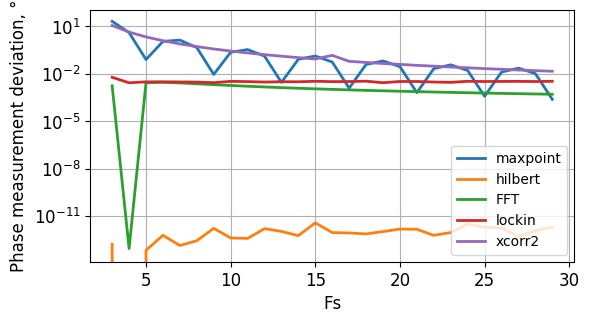

In [7]:
plot_for_one_fs(phase_methods,fs_mults,result)